# Программирование и компьютерные науки

## Семинар 8

На лекции было рассказано, что метод построения решающего дерева определяется следующими пунктами:
- Видом предикатов в вершинах;
- Критерием информативности;
- Критерием останова;
- Методом обработки пропущенных значений;
- Методом стрижки.

Именно про различные критерии информативности мы и будем говорить дальше.

## Критерии информативности в решающих деревьях

При построении дерева необходимо задать *функционал* $Q(X, j, s)$,
на основе которого осуществляется разбиение выборки на каждом шаге.

Рассмотрим различные способы задания таких функционалов в задачах классификации. Пусть $R_m$~--- множество объектов обучающей выборки, попавших в вершину $m$.

- $N_m = |R_m|$ - число таких объектов.
- $p_{mk}$ - доля объектов класса $k$ ($k \in \{1, \dots, K\}$), попавших в вершину $m$:

$$p_{mk}=\frac{1}{N_m} \sum_{(x_i, y_i) \in R_m}[y_i = k],$$

- Через $k_m$ обозначим класс, чьих представителей оказалось больше всего среди объектов, попавших в вершину $m$:

$$k_m = arg \max_k p_{mk}$$.

- Посмотрим как выглядит критерий информативности, который является долей объектов из $R_m$, которые были бы неправильно классифицированы, если бы вершина $m$ была листовой и относила все объекты к классу $k_m$:

$$F_E(R_m)=\frac{1}{N_m}\sum_{(x_i, y_i) \in R_m}[y_i \neq k_m].$$


Функционал ошибки при ветвлении вершины $m$ определяется как
$$
Q_E(R_m, j, s) = F_E(R_m) - \frac{N_\ell}{N_m} F_E(R_\ell) - \frac{N_r}{N_m} F_E(R_r),
$$
где $\ell$ и $r$ - индексы левой и правой дочерних вершин.
Данный функционал необходимо максимизировать.

# Индекс Джини

Критерий информативности имеет вид
$$
F_G(R_m)=\sum_{k \neq k'}p_{mk} p_{mk'}.
$$

Функционал определяется так же, как и в предыдущем случае:
$$
Q_G(R_m, j, s) = F_G(R_m) - \frac{N_\ell}{N_m} F_G(R_\ell) - \frac{N_r}{N_m} F_G(R_r).
$$

## Критерий останова построения дерева

Для любой непротиворечивой обучающей выборки можно построить решающее дерево, которое имеет нулевую ошибку на данной выборке. Если мы рассмотрим объекты, как точки в пространстве признаков, то каждую эту точку можно ограничить n-мерным кубиком, который не будет содержать других точек. n-мерный кубик прекрасно можно задать деревом.

 Однако в этом случае имеет место **переобучение**. 

В связи с этим встаёт вопрос: в каком случае вершину следует объявить листовой?

Рассмотрим модельную задачу регрессии. Объектами будут являться точки на плоскости (т.е. каждый объект описывается 2 признаками), целевой переменной — расстояние от объекта до точки (0, 0).

In [ ]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt


Populating the interactive namespace from numpy and matplotlib


In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

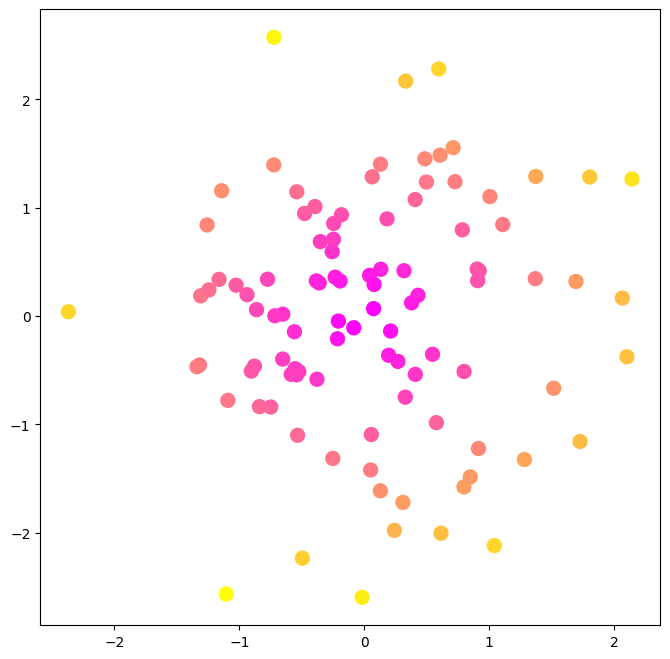

In [ ]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

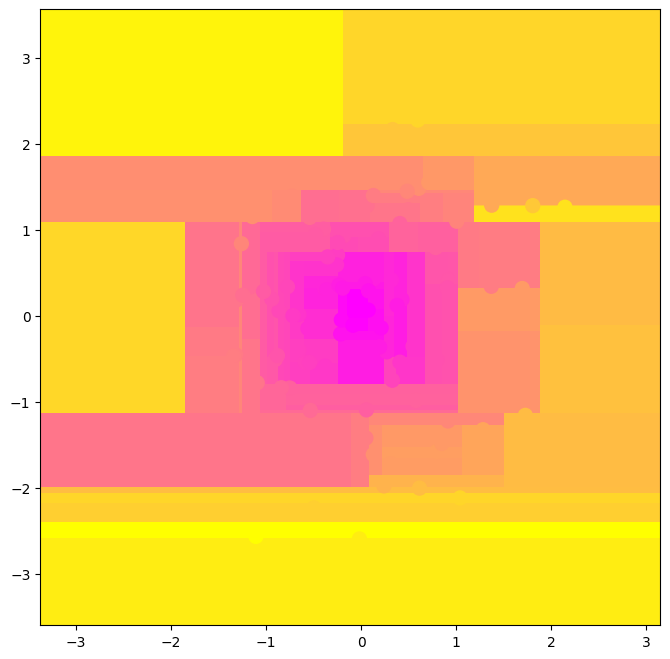

In [ ]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

Посмотрим как будут выглядеть разделяющая поверхность в зависимости от 
- минимального количества объектов в листе
- максимальной глубины дерева

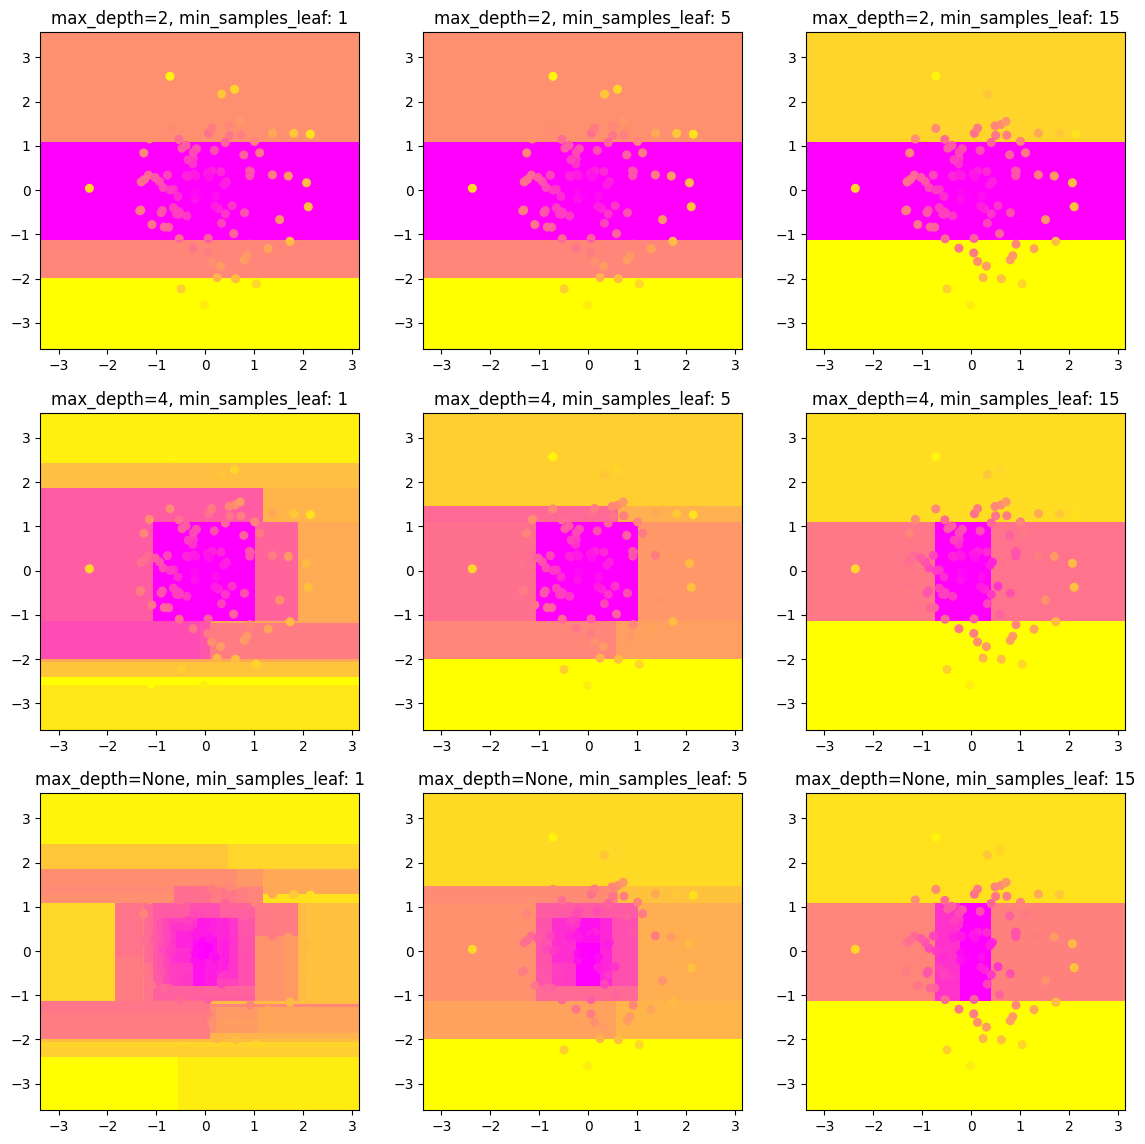

In [ ]:
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([1, 5, 15]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

- Увеличение максимальной глубины и/или уменьшение минимального количества объектов выборки в листе приводит к увеличению качества на обучающей выборке и переобучению.

## Неустойчивость решающих деревьев

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться.
Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.


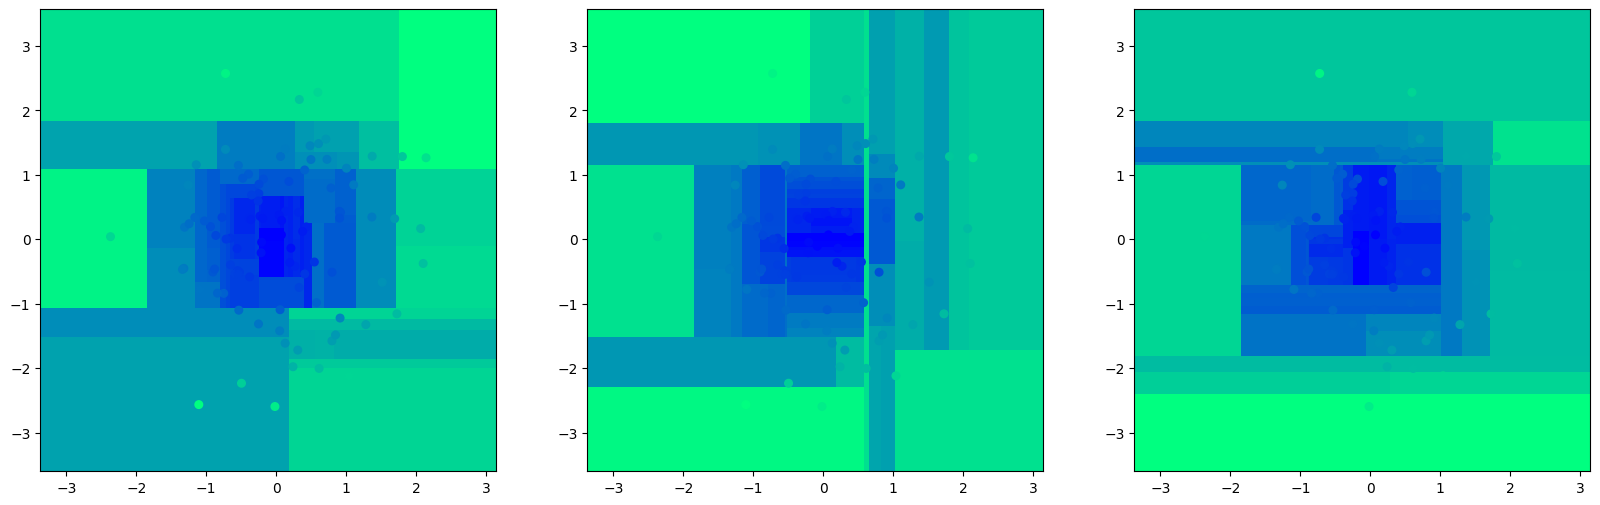

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indecies = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indecies], data_y[indecies])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter')

## Подбор параметров

Посмотрим на качество дерева в зависимости от параметров на наборе с прошлого семинара

In [ ]:
from sklearn import preprocessing

In [ ]:
!wget -O 'train.csv' -q 'https://www.dropbox.com/s/cgiksr8htwec3xp/train.csv?dl=0'

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,Id,Room,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
0,1,5,210020000.0,198,балкон,1,2,NaN,вторичка,NaN,Сокол,САО
1,2,2,17630000.0,64,NaN,3,8,монолитный,вторичка,грузовой,Зюзино,ЮЗАО
2,3,5,142400000.0,161,балкон,7,7,кирпичный,вторичка,пассажирский,Пресненский,ЦАО
3,4,5,142520000.0,265,NaN,5,5,кирпичный,вторичка,NaN,Басманный,ЦАО
4,5,3,34070000.0,88,NaN,10,42,монолитный,вторичка,грузовой,Хорошевский,САО


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40508 entries, 0 to 40507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40508 non-null  int64  
 1   Room         40508 non-null  int64  
 2   Price        40508 non-null  float64
 3   Size         40508 non-null  int64  
 4   Balcony      27758 non-null  object 
 5   Floor        40508 non-null  int64  
 6   FloorsTotal  40508 non-null  int64  
 7   Walls        34623 non-null  object 
 8   Age          39967 non-null  object 
 9   Lift         31082 non-null  object 
 10  District     40151 non-null  object 
 11  Okrug        40151 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.7+ MB


In [ ]:
data.fillna('nan', inplace=True)

In [ ]:
categorical_features = [
    'Balcony',
    'Walls',
    'Age',
    'Okrug',
    'District',
    'Lift',
]

In [ ]:
categorizer = preprocessing.OneHotEncoder()
X_cat = categorizer.fit_transform(data[categorical_features].values).toarray()

In [ ]:
numerical_features = list(data.select_dtypes('int64', exclude=['object']).columns)
numerical_features

['Id', 'Room', 'Size', 'Floor', 'FloorsTotal']

In [ ]:
normalizer = preprocessing.StandardScaler()
X_normalized = normalizer.fit_transform(data[numerical_features])

In [ ]:
X = np.hstack((X_normalized, X_cat))
X.shape

(40508, 151)

In [ ]:
y = data['Price'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, 
                                        random_state=241)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(shuffle=True, random_state=241)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
print(-cross_val_score(regr, X_train, y_train, cv=cv, 
                       scoring='neg_mean_squared_error').mean())

856467065634223.8


In [ ]:
regr.fit(X_train, y_train)
regr.tree_

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
print(cross_val_score(regr, X, y, cv=cv, 
                       scoring='r2').mean())

0.705238866424


In [ ]:
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50]},
                  cv=cv,
                  scoring='r2')
gs.fit(X, y)
gs.grid_scores_

[mean: 0.60310, std: 0.07101, params: {'max_features': None, 'max_depth': 2},
 mean: 0.42140, std: 0.06060, params: {'max_features': 'log2', 'max_depth': 2},
 mean: 0.42140, std: 0.06060, params: {'max_features': 'sqrt', 'max_depth': 2},
 mean: 0.73879, std: 0.11251, params: {'max_features': None, 'max_depth': 4},
 mean: 0.38099, std: 0.12633, params: {'max_features': 'log2', 'max_depth': 4},
 mean: 0.38099, std: 0.12633, params: {'max_features': 'sqrt', 'max_depth': 4},
 mean: 0.76242, std: 0.03348, params: {'max_features': None, 'max_depth': 6},
 mean: 0.51970, std: 0.05065, params: {'max_features': 'log2', 'max_depth': 6},
 mean: 0.51970, std: 0.05065, params: {'max_features': 'sqrt', 'max_depth': 6},
 mean: 0.73660, std: 0.00573, params: {'max_features': None, 'max_depth': 8},
 mean: 0.59787, std: 0.05413, params: {'max_features': 'log2', 'max_depth': 8},
 mean: 0.59787, std: 0.05413, params: {'max_features': 'sqrt', 'max_depth': 8},
 mean: 0.72800, std: 0.00374, params: {'max_feat

In [ ]:
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'],
                              'max_depth': [2, 4, 6, 8, 10, 20, 50], 
                              'min_samples_leaf': range(1, 20)},
                  cv=cv,
                  scoring='r2')
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=406, n_folds=3, shuffle=True, random_state=241),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=241,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 20, 50], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [ ]:
gs.best_score_

0.775856892150106

In [ ]:
for z in gs.grid_scores_:
    if z.mean_validation_score == gs.best_score_:
        print(z)

mean: 0.77586, std: 0.03204, params: {'max_features': None, 'max_depth': 6, 'min_samples_leaf': 2}


## Решающие леса

Чтобы уменьшить влияние рассмотренных недостатков решающих деревьев, используют **случайные леса (random forest)**. Одно дерево может ошибаться, поэтому давайте построим много деревьев и "усредним" их ответы.

Если строить все эти леса по одной и той же обучающей выборке, они будут одинаковые, поэтому для каждого решающего дерева, которое мы строим:
* вместо исходной обучающей выборки $X^l$ используется бутстрап (т.е. выборка $l$ объектов **с возвращениями**);
* в каждой внутренней вершине выбор условия осуществляется не среди всех признаков, а среди $q$ случайно выбранных.

Такая рандомизация обеспечит нам различность деревьев. После того, как таким образом были получены алгоритмы $b_1(x), ... b_N(x)$ можно построить итоговый алгоритм как:
* **выбор большинства** в случае классификации: $a(x) = \arg \max_{y in \mathbb{Y}} \sum_{n=1}^N [b_n(x) = y]$
* **среднее** в случае регрессии: $a(x) = \frac{1}{N} \sum_{n = 1}^N b_n(x)$

Посмотрим, какое качество можно получить при использовании различных способов усреднения деревьев.

In [ ]:
regr = DecisionTreeRegressor()
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.705602091005


In [ ]:
regr = DecisionTreeRegressor()
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.727720843257


In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=241)
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.744495766448


In [ ]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=241,
                        max_samples=0.707)
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.835364857972


In [ ]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                        bootstrap=False, random_state=241,
                        max_samples=0.5)
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.83885573889


In [ ]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=1000,
                        bootstrap=False, random_state=241,
                        max_samples=0.5)
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.839208296696


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10)
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.831968576342


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100)
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.847266009473


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=300)
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.848919088623


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=500)
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.84927323603


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=1000)
print(cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean())

0.849551357468
